In [1]:
# My standard magic !  You will see this in almost all my notebooks.

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Reload all modules imported with %aimport
%load_ext autoreload
%autoreload 1

%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

import gen_data as gd
%aimport gen_data

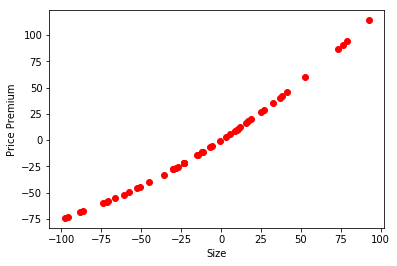

In [3]:
v1, a1 = 1, .005
X, y = gd.gen_data(num=50, v=v1, a=a1)

xlabel, ylabel = "Size", "Price Premium"
gd.gen_plot(X, y, xlabel, ylabel)

In [4]:
import pandas as pd
df = pd.DataFrame( {"X": X.ravel(), "Y":y.ravel()})
df.head()

df.describe()

,X,Y
0,24.835708,26.377739
1,-6.913215,-6.793734
2,32.384427,35.006305
3,76.151493,90.649117
4,-11.707669,-11.364995


,X,Y
count,50.000000,50.000000
mean,-11.273695,-5.616563
std,46.683439,45.278755
min,-97.983506,-73.981587
25%,-43.048955,-38.374426
50%,-11.707258,-11.364609
75%,16.813778,17.521546
max,92.613909,114.057250


In [5]:
print("Y:\n size={}\n mean={}\n std={}\n min={}\n max={}\n".format(y.size, y.mean(), y.std(), y.min(), y.max()))

Y:
 size=50
 mean=-5.616563210748966
 std=44.823680417643054
 min=-73.98158747882019
 max=114.05724968049518



In [6]:
print("y.std() = {ys:3.2f}, df[\"Y\"].std() = {Ys:3.2f}".format(ys=y.std(), Ys=df["Y"].std()))

print( (y.size * y.std()**2) - ((y.size-1) * df["Y"].std()**2) )

y.std() = 44.82, df["Y"].std() = 45.28
0.0


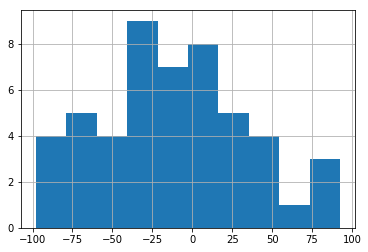

In [7]:
_ = df["X"].hist()

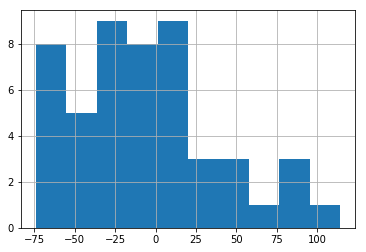

In [8]:
_ = df["Y"].hist()

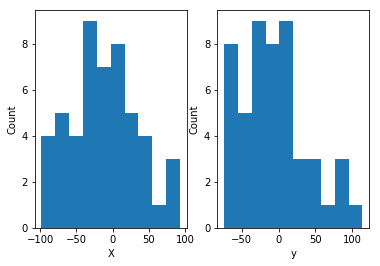

In [9]:
fig = plt.figure()

ax = fig.add_subplot(121)
_ = ax.hist(X)
_ = ax.set_xlabel("X")
_ = ax.set_ylabel("Count")

ax = fig.add_subplot(122)
_ = ax.hist(y)
_ = ax.set_xlabel("y")
_ = ax.set_ylabel("Count")

In [10]:
def split(X, y, shuffle=True, pct=.80, seed=42):
    rng = np.random.RandomState(42)
    
    num = y.shape[0]
    
    idxs = list( range(0, num))
    
    if(shuffle):
        rng.shuffle(idxs)
    
    split_idx = int( num * pct )
    
    X_train, y_train = X[ idxs[:split_idx] ], y[ idxs[:split_idx] ]
    X_test, y_test = X[ idxs[split_idx:] ], y[ idxs[split_idx:] ]
    
    return X_train, X_test, y_train, y_test

In [11]:
X_train, X_test, y_train, y_test = split(X,y)

X_train.shape, X_test.shape
y_train.shape, y_test.shape

((40, 1), (10, 1))

((40, 1), (10, 1))

In [12]:
type(X)
type(X_train)

numpy.ndarray

numpy.ndarray

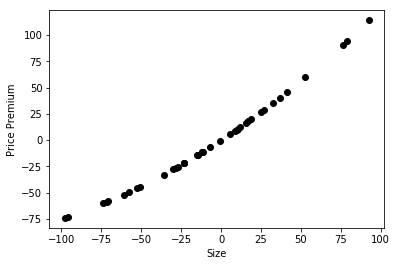

In [13]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

_ = ax.scatter(X_train, y_train, color='black')
_ = ax.set_xlabel(xlabel)
_ = ax.set_ylabel(ylabel)

In [14]:
regr = linear_model.LinearRegression()

_ = regr.fit(X_train, y_train)

print('Coefficients: \n', regr.intercept_, regr.coef_)
print('\nShape of intercept: {i}; Shape of coefficient: {c}'.format(i=regr.intercept_.shape, c=regr.coef_.shape))

Coefficients: 
 [4.93224426] [[0.96836946]]

Shape of intercept: (1,); Shape of coefficient: (1, 1)


In [15]:
np.array([100]).reshape(-1,1)

array([[100]])

In [16]:
t = [100]

t_array = np.array(t).reshape(-1,1)

print("For size {s}, predicted {attr} {d}".format(s=t, attr=ylabel, d=regr.predict(t_array)))

For size [100], predicted Price Premium [[101.76919047]]


In [17]:
y_pred = regr.predict(X_test)
y_pred

array([[-17.50573283],
       [  8.20185682],
       [-39.03289502],
       [-80.43146808],
       [ 75.89671976],
       [ 42.09026205],
       [ -0.66726899],
       [-78.58564342],
       [-24.14976399],
       [-59.37649623]])

In [18]:
rmse = np.sqrt( mean_squared_error(y_test, y_pred) )
print("Root Mean Squared Error: {:.2f}".format(rmse))

print("R-squared: {:.2f}".format(r2_score(y_test, y_pred)))

Root Mean Squared Error: 6.86
R-squared: 0.98


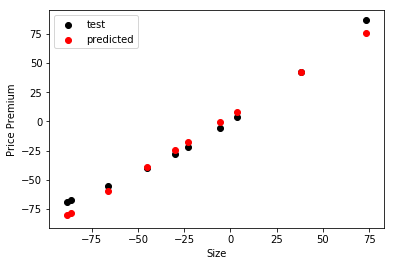

In [19]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

_ = ax.scatter(X_test, y_test, color='black', label="test")
_ = ax.scatter(X_test, y_pred, color='red', label="predicted")
_ = ax.set_xlabel(xlabel)
_ = ax.set_ylabel(ylabel)
_ = ax.legend()

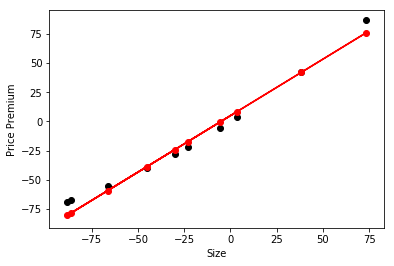

In [20]:
fig = plt.figure()
ax  = fig.add_subplot(1,1,1)

_ = ax.scatter(X_test, y_test, color='black', label="test")
_ = ax.scatter(X_test, y_pred, color="red",   label="predicted")

_ = ax.plot(X_test, y_pred, color='red')
_ = ax.set_xlabel(xlabel)
_ = ax.set_ylabel(ylabel)

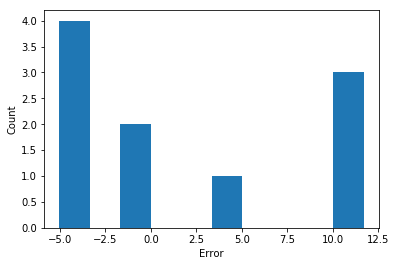

In [21]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
_ = ax.hist( (y_test - y_pred) )
_ = ax.set_xlabel("Error")
_ = ax.set_ylabel("Count")

In [22]:
y_pred_train = regr.predict(X_train)

rmse = np.sqrt( mean_squared_error(y_train, y_pred_train) )
print("Root Mean Squared Error: {:.2f}".format( rmse ) )

print("R-squared (train): {:.2f}".format(r2_score(y_train, y_pred_train)))

Root Mean Squared Error: 6.56
R-squared (train): 0.98


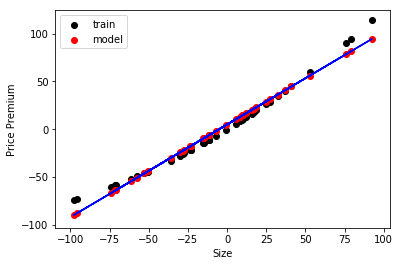

In [23]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

_ = ax.scatter(X_train, y_train, color='black', label="train")
_ = ax.scatter(X_train, y_pred_train, color='red', label='model')

_ = ax.plot(X_train, y_pred_train, color='blue')
_ = ax.set_xlabel(xlabel)
_ = ax.set_ylabel(ylabel)
_ = ax.legend()

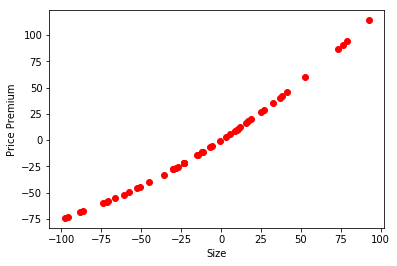

In [24]:
X_orig, y_orig = gd.gen_data(num=50, v=v1, a=a1)

gd.gen_plot(X_orig, y_orig, xlabel, ylabel)

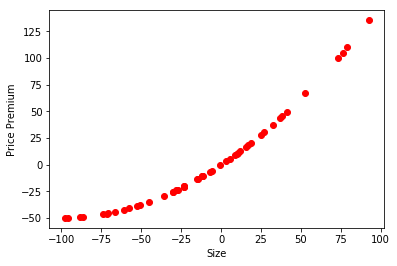

In [25]:
v2, a2 = v1, a1*2
X_curve, y_curve = gd.gen_data(num=50, v=v2, a=a2)
gd.gen_plot(X_curve, y_curve, xlabel, ylabel)

In [26]:
X

array([[ 24.83570765],
       [ -6.91321506],
       [ 32.38442691],
       [ 76.15149282],
       [-11.70766874],
       [-11.70684785],
       [ 78.96064078],
       [ 38.37173646],
       [-23.4737193 ],
       [ 27.12800218],
       [-23.17088464],
       [-23.28648768],
       [ 12.09811358],
       [-95.66401223],
       [-86.24589163],
       [-28.11437646],
       [-50.64155602],
       [ 15.71236663],
       [-45.40120378],
       [-70.61518507],
       [ 73.28243845],
       [-11.28881502],
       [  3.37641023],
       [-71.23740931],
       [-27.21913623],
       [  5.54612949],
       [-57.54967887],
       [ 18.78490092],
       [-30.0319345 ],
       [-14.58468749],
       [-30.08533061],
       [ 92.61390923],
       [ -0.67486124],
       [-52.88554645],
       [ 41.12724561],
       [-61.0421825 ],
       [ 10.44317975],
       [-97.98350619],
       [-66.40930244],
       [  9.84306179],
       [ 36.923329  ],
       [  8.56841406],
       [ -5.78241412],
       [-15

In [27]:
def plot_fit(X, y, ax=ax, on_idx=0):
    sort_idx = X[:, on_idx].argsort()
    X_sorted = X[ sort_idx, : ]
    y_sorted = y[ sort_idx, : ]
    
    _ = ax.plot( X_sorted[:, on_idx], y_sorted, color='red' )

In [28]:
def transform(X):
    X_p2 = np.concatenate( [X, X**2], axis=1 )
    return X_p2

def run_regression(X, y, run_transforms=False):
    X_train, X_test, y_train, y_test = split(X, y)
    
    if(run_transforms):
        X_train = transform(X_train)
        X_test = transform(X_test)
        
    regr = linear_model.LinearRegression()
    
    _ = regr.fit(X_train, y_train)
    
    print('Coefficient:\n', regr.intercept_, regr.coef_)
    y_pred = regr.predict(X_test)
    
    print("R-squared (test): {:.2f}".format(r2_score(y_test, y_pred)))
    
    y_pred_train = regr.predict(X_train)
    print("R-squared (train): {:.2f}".format(r2_score(y_train, y_pred_train)))
    
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    
    _ = ax.scatter(X_test[:,0], y_test, color='black')
    _ = ax.scatter(X_test[:,0], y_pred, color='red')
    
    plot_fit(X_test, y_pred, ax=ax, on_idx=0)
    _ = ax.set_xlabel(xlabel)
    _ = ax.set_ylabel(ylabel)
    
    return

Coefficient:
 [4.93224426] [[0.96836946]]
R-squared (test): 0.98
R-squared (train): 0.98


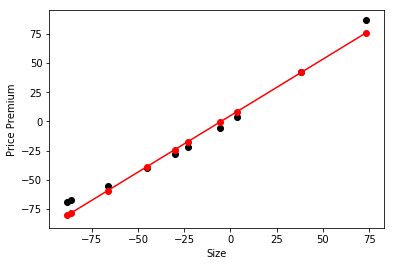

In [29]:
run_regression(X_orig, y_orig)

Coefficient:
 [9.86448852] [[0.93673892]]
R-squared (test): 0.91
R-squared (train): 0.91


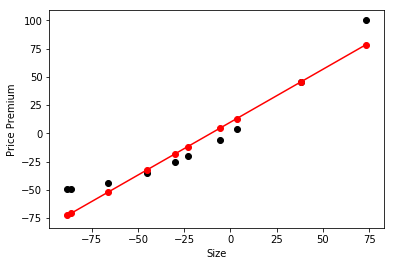

In [30]:
run_regression(X_curve, y_curve)

Coefficient:
 [-3.55271368e-15] [[1.    0.005]]
R-squared (test): 1.00
R-squared (train): 1.00


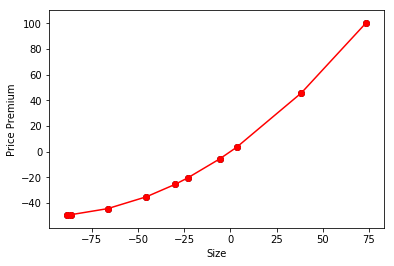

In [31]:
run_regression(X_curve, y_curve, True)

Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('linearregression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

Score (train):  1.0
Score (test):  1.0
Last element of pipeline:  ('linearregression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))
Score (test, via LinearRegression object):  0.8671060075570481
R-squared score (test): 1.00


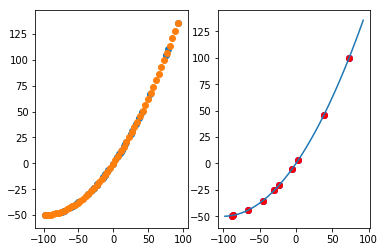

In [41]:
X_curve, y_curve = gd.gen_data(num=50, v=v2, a=a2)

X_train, X_test, y_train, y_test = split(X_curve, y_curve)

xfit = np.linspace(0, 10, 1000)

from sklearn.preprocessing import PolynomialFeatures
import sklearn.preprocessing as pre_proc

from sklearn.pipeline import make_pipeline
poly_model = make_pipeline(pre_proc.PolynomialFeatures(2), linear_model.LinearRegression())

x=None
y=None

poly_model.fit(X_train.reshape(-1,1), y_train)

xfit = np.linspace( X_train[:,0].min(), X_train[:,0].max() ).reshape(-1,1)
yfit = poly_model.predict(xfit)

fig = plt.figure()

ax = fig.add_subplot(121)
_ = ax.scatter(X_train, y_train)
_ = ax.scatter(xfit, yfit)

y_pred = poly_model.predict(X_test.reshape(-1,1))

print("Score (train): ", poly_model.score(X_train.reshape(-1,1), y_train))
print("Score (test): ", poly_model.score(X_test.reshape(-1,1), y_test))

print("Last element of pipeline: ", poly_model.steps[1])
regr_ = poly_model.steps[-1]

print("Score (test, via LinearRegression object): ", regr.score(X_test.reshape(-1,1), y_test))

ax = fig.add_subplot(122)
_ = ax.scatter(X_test, y_test, color='blue')
_ = ax.scatter(X_test, y_pred, color='red')

_ = ax.plot(xfit, yfit)
    
print("R-squared score (test): {:.2f}".format(r2_score(y_test, y_pred)))

In [42]:
poly_model.steps

[('polynomialfeatures',
  PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)),
 ('linearregression',
  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))]

In [43]:
poly_model.steps[-1]

('linearregression',
 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))

Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=7, include_bias=True, interaction_only=False)), ('linearregression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

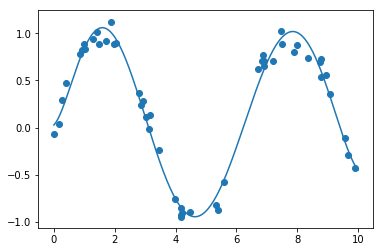

In [45]:
xfit = np.linspace(0, 10, 1000)

from sklearn.preprocessing import PolynomialFeatures

from sklearn.pipeline import make_pipeline
degree = 7
poly_model = make_pipeline(PolynomialFeatures(degree), linear_model.LinearRegression())

rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)

poly_model.fit(x[:, np.newaxis], y)
yfit = poly_model.predict(xfit[:, np.newaxis])

_ = plt.scatter(x, y)
_ = plt.plot(xfit, yfit)